In [1]:
%matplotlib inline
import h5py,glob,os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from pycbc.inference import io, models
#from pycbc.workflow import WorkflowConfigParser
from pycbc import conversions,detector
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [2]:
def maxl_det_time(path,det='L1'):
    f = h5py.File(path,'r')
    ii = np.argmax(f['samples']['loglikelihood'][:])
    delta_tc = f['samples']['delta_tc'][ii]
    tc = f.attrs['trigger_time'] + delta_tc
    Det = detector.Detector(det)
    delay = Det.time_delay_from_earth_center(f['samples']['ra'][ii],
                                         f['samples']['dec'][ii],
                                         tc)
    f.close()
    return tc + delay

def det_time(path,det='L1'):
    f = h5py.File(path,'r')
    delta_tc = f['samples']['delta_tc'][:]
    tc = f.attrs['trigger_time'] + delta_tc
    Det = detector.Detector(det)
    delay = Det.time_delay_from_earth_center(f['samples']['ra'][:],
                                         f['samples']['dec'][:],
                                         tc)
    f.close()
    return tc + delay

# GW150914

In [4]:
p = '/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/GW150914_095045-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf'
maxl_det_time(p,det='H1')

1126259462.4237013

# GW200129

In [4]:
p2 = '/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/GW200129_065458-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf'

In [5]:
t2 = det_time(p2)

# GW190521

In [25]:
#what Collin used
tref = 1242442967.445
ra = 3.5
dec = 0.73

det = detector.Detector('L1')
delta = det.time_delay_from_earth_center(ra,dec,tref)
tnr = tref + delta 

bins = np.linspace(np.min(t190521),np.max(t190521),100)
plt.hist(t190521,bins=bins,label='4-OGC posterior')
plt.axvline(tnr,label='NR maxL')
plt.legend()
plt.title('L1 detector time')

In [28]:
maxl_det_time(p2,det='L1')-tnr

0.008869171142578125

# GW200129

In [29]:
f = h5py.File('/work/yifan.wang/4ogc/LVK/GWTC-3/IGWN-GWTC3p0-v1-GW200129_065458_PEDataRelease_mixed_cosmo.h5')

In [30]:
f.keys()

<KeysViewHDF5 ['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']>

In [35]:
f['C01:IMRPhenomXPHM']['posterior_samples']['L1_time']

array([1.26431612e+09, 1.26431612e+09, 1.26431612e+09, ...,
       1.26431612e+09, 1.26431612e+09, 1.26431612e+09])

In [42]:
f['C01:SEOBNRv4PHM']['posterior_samples']
f['C01:Mixed']['posterior_samples']
#There is no time!!

<HDF5 dataset "posterior_samples": shape (1993,), type "|V472">

In [48]:
ii = np.argmax(f['C01:IMRPhenomXPHM']['posterior_samples']['log_likelihood'][:])
f['C01:IMRPhenomXPHM']['posterior_samples']['L1_time'][ii]

1264316116.4284303

In [49]:
fnocos = h5py.File('/work/yifan.wang/4ogc/LVK/GWTC-3/IGWN-GWTC3p0-v1-GW200129_065458_PEDataRelease_mixed_nocosmo.h5')

In [50]:
ii = np.argmax(fnocos['C01:IMRPhenomXPHM']['posterior_samples']['log_likelihood'][:])
fnocos['C01:IMRPhenomXPHM']['posterior_samples']['L1_time'][ii]

1264316116.4284303

In [47]:
maxl_det_time(path='/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/GW200129_065458-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf',det='L1')

1264316116.42751

In [51]:
maxl_det_time(path='/work/yifan.wang/ringdown/GW200129/t2-imr-tphm/result.hdf',det='L1')

1264316116.426454

In [58]:
tphm = h5py.File('/work/yifan.wang/ringdown/GW200129/t2-imr-tphm/extract.hdf','r')

In [59]:
tphm['samples']['loglikeliho']

<KeysViewHDF5 ['chi_eff', 'chi_p', 'coa_phase', 'dec', 'delta_tc', 'distance', 'inclination', 'loglikelihood', 'logwt', 'q', 'ra', 'recalib_amplitude_h1_0', 'recalib_amplitude_h1_1', 'recalib_amplitude_h1_2', 'recalib_amplitude_h1_3', 'recalib_amplitude_h1_4', 'recalib_amplitude_h1_5', 'recalib_amplitude_h1_6', 'recalib_amplitude_h1_7', 'recalib_amplitude_h1_8', 'recalib_amplitude_h1_9', 'recalib_amplitude_l1_0', 'recalib_amplitude_l1_1', 'recalib_amplitude_l1_2', 'recalib_amplitude_l1_3', 'recalib_amplitude_l1_4', 'recalib_amplitude_l1_5', 'recalib_amplitude_l1_6', 'recalib_amplitude_l1_7', 'recalib_amplitude_l1_8', 'recalib_amplitude_l1_9', 'recalib_amplitude_v1_0', 'recalib_amplitude_v1_1', 'recalib_amplitude_v1_2', 'recalib_amplitude_v1_3', 'recalib_amplitude_v1_4', 'recalib_amplitude_v1_5', 'recalib_amplitude_v1_6', 'recalib_amplitude_v1_7', 'recalib_amplitude_v1_8', 'recalib_amplitude_v1_9', 'recalib_phase_h1_0', 'recalib_phase_h1_1', 'recalib_phase_h1_2', 'recalib_phase_h1_3', '

In [61]:
ii = np.argmax(tphm['samples']['loglikelihood'][:])

In [62]:
tphm['samples']['ra'][ii]

5.538412759732993

In [63]:
tphm['samples']['dec'][ii]

0.14225109429017488

In [64]:
tphm['samples']['delta_tc'][ii] + tphm.attrs['trigger_time']

1264316116.4098656

In [72]:
from pycbc import conversions,coordinates,cosmology

In [67]:
f=tphm

In [68]:
spin1_x,spin1_y,spin1_z = coordinates.spherical_to_cartesian(f['samples']['spin1_a'], \
                                                              f['samples']['spin1_azimuthal'],\
                                                              f['samples']['spin1_polar'])
spin2_x,spin2_y,spin2_z = coordinates.spherical_to_cartesian(f['samples']['spin2_a'], \
                                                              f['samples']['spin2_azimuthal'],\
                                                              f['samples']['spin2_polar'])
    # final mass
mfsample = conversions.final_mass_from_initial(mass1=f['samples']['srcmass1'],\
                                                   mass2=f['samples']['srcmass2'],\
                                                   spin1x=spin1_x,spin1y=spin1_y,spin1z=spin1_z,\
                                                   spin2x=spin2_x,spin2y=spin2_y,spin2z=spin2_z)

In [74]:
mfsample[ii] * (1+f['samples']['redshift'][ii])

70.76017590321163

In [75]:
import lal

In [77]:
lal.MTSUN_SI * 70.76017590321163 * 7

0.0024397002796400762

In [6]:
p = '/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/GW200129_065458-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf'

In [10]:
t = det_time(p)
bins = np.linspace(np.min(t),np.max(t),100)

In [12]:
tligo = np.loadtxt('./LVKringdownfile/pyRing_PE_inputs/Peak_time_data/GW200129A_L1_peaktime_GWrec_point_estimate_IMRPhenomXPHM_median_10000_Prod5_91daedd9b8bdea3a4fac686710193b54a087959f.dat')

In [43]:
t3 = np.loadtxt('./LVKringdownfile/pyRing_PE_inputs/Peak_time_data/L1_peaktime_GWrec_posterior_GW200129A_IMRPhenomXPHM_10000_Prod5_91daedd9b8bdea3a4fac686710193b54a087959f.dat')

In [44]:
ptphm = '/work/yifan.wang/ringdown/GW200129/t2-imr-tphm/extract.hdf'
tphm = det_time('/work/yifan.wang/ringdown/GW200129/t2-imr-tphm/extract.hdf')
bins2 = np.linspace(np.min(tphm),np.max(tphm),100)

In [45]:
t3[:]

array([1.26431612e+09, 1.26431612e+09, 1.26431612e+09, ...,
       1.26431612e+09, 1.26431612e+09, 1.26431612e+09])

In [47]:
bins3 = np.linspace(np.min(t3),np.max(t3),100)

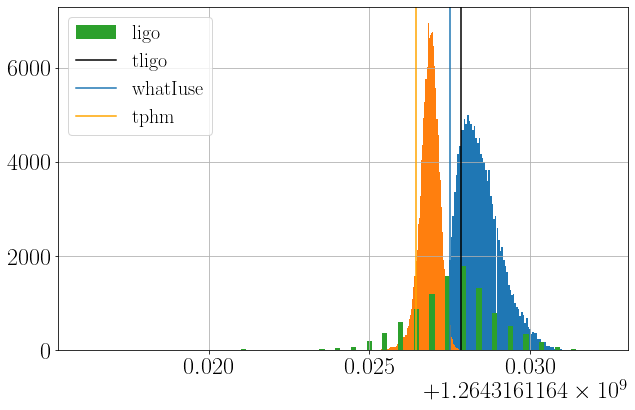

In [48]:
plt.hist(t,bins=bins)
plt.hist(tphm,bins=bins2)
plt.hist(t3[:],bins=bins3,label='ligo')
plt.axvline(tligo[0],color='black',label='tligo')
plt.axvline(maxl_det_time(p,det='L1'),label='whatIuse')
plt.axvline(maxl_det_time(ptphm),color='orange',label='tphm')
plt.legend()

# GW200224

In [ ]:
p = '/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/'